In [26]:
# Sales Data Analysis: Walmart Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For datetime processing
from datetime import datetime

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

#1 Data Collection
df = pd.read_csv("Walmart.csv")  # Replace with your actual CSV filename
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [28]:
#Check Data Integrity
print("Shape of dataset:", df.shape)
print("Missing values per column:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

Shape of dataset: (6435, 8)
Missing values per column:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
Duplicate rows: 0


In [33]:
# Data Cleaning
# Remove duplicates
df = df.drop_duplicates()

# Handle missing values (example: fill NA or drop depending on context)
df = df.dropna()  # Or use df.fillna(method='ffill') as per use-case

In [39]:
# Convert Date Column
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True) 
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

In [51]:
print(df.columns)

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')


In [53]:
#2. Data Exploration
# Sales trend by store and product category
store_sales = df.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False)
category_sales = df.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=True)

print("Top 5 stores by sales:\n", store_sales.head())
print("Top 5 departments by sales:\n", category_sales.head())

Top 5 stores by sales:
 Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64
Top 5 departments by sales:
 Store
33    37160221.96
44    43293087.84
5     45475688.90
36    53412214.97
38    55159626.42
Name: Weekly_Sales, dtype: float64


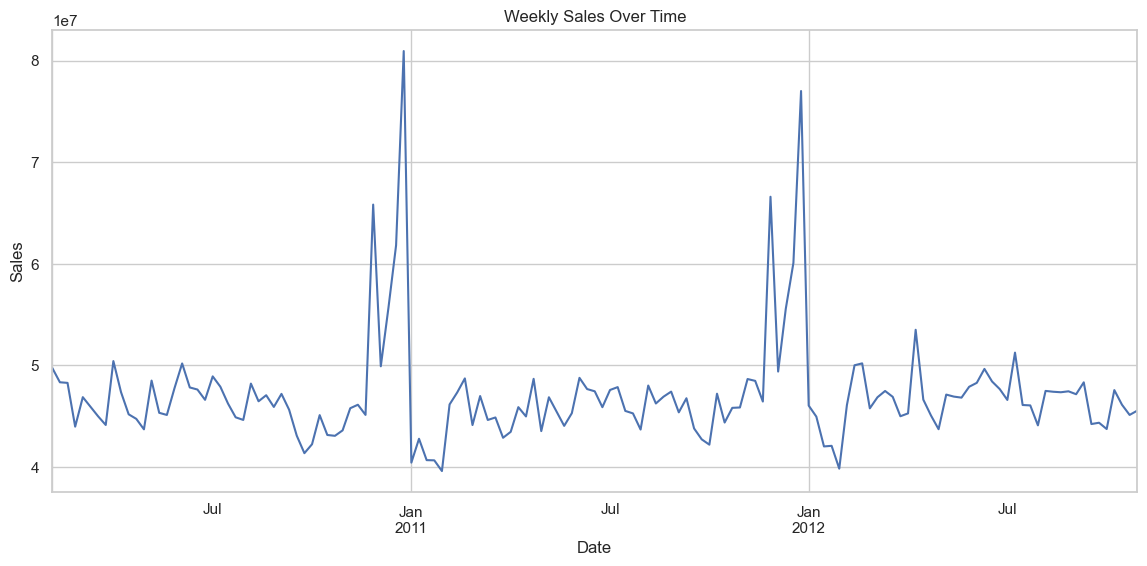

In [57]:
#4. Exploratory Data Analysis (EDA)

# Line plot: sales over time
plt.figure(figsize=(14,6))
df['Weekly_Sales'].resample('W').sum().plot()
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

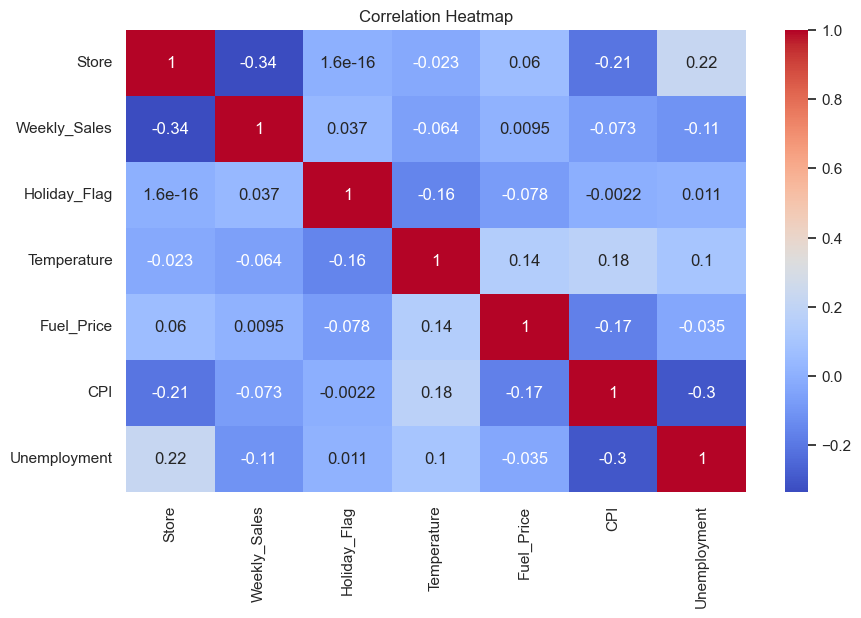

In [59]:
# Seasonal Patterns & Correlations
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

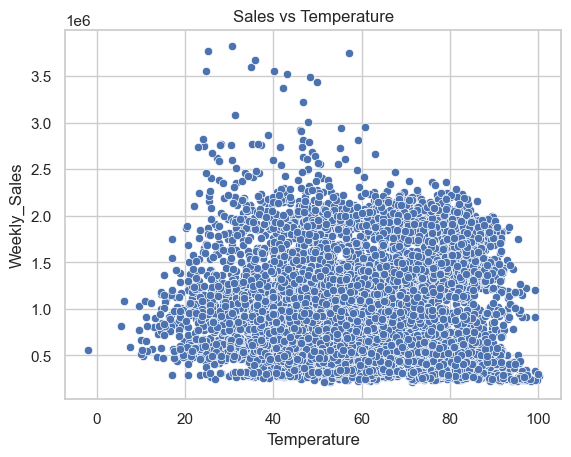

In [63]:
#5. Feature Selection Example
# Let's check sales trend for holiday impact
if 'IsHoliday' in df.columns:
    holiday_sales = df.groupby('IsHoliday')['Weekly_Sales'].mean()
    print("Average Sales (Holiday vs Non-Holiday):\n", holiday_sales)

# Pricing impact example
if 'Temperature' in df.columns:
    sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales')
    plt.title("Sales vs Temperature")
    plt.show()

In [65]:
# Conclusion
# Summarize key insights
print("""
Key Findings:
- Sales peak during holiday weeks.
- Certain stores and departments consistently perform better.
- There is a seasonal sales pattern visible in the time series.
- Pricing and weather might influence sales.

Recommendations:
- Focus inventory and promotions on top-performing stores and categories.
- Align marketing campaigns with seasonal trends.
- Plan inventory ahead of holidays to leverage peak demand.
""")


Key Findings:
- Sales peak during holiday weeks.
- Certain stores and departments consistently perform better.
- There is a seasonal sales pattern visible in the time series.
- Pricing and weather might influence sales.

Recommendations:
- Focus inventory and promotions on top-performing stores and categories.
- Align marketing campaigns with seasonal trends.
- Plan inventory ahead of holidays to leverage peak demand.

